# Introduction
refer to this solution :https://www.kaggle.com/jsaguiar/lightgbm-7th-place-solution

https://www.tinymind.cn/articles/3655

https://github.com/Featuretools/Automated-Manual-Comparison/tree/master/Loan%20Repayment

https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction/

# Read Data

In [112]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import featuretools as ft
import lightgbm as lgb
%matplotlib inline
import seaborn as sns

RSEED = 50

In [113]:
# read in data and check basic info
def read_check_data(file_path):
    data = pd.read_csv(file_path)
    print('Training data shape: ', data.shape)
    print(data.head())
    return data

In [114]:
app_train = read_check_data("./data/application_train.csv")

Training data shape:  (307511, 122)
   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

              ...              FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0           

In [191]:
app_test = read_check_data("./data/application_test.csv")

Training data shape:  (48744, 121)
   SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

              ...          

In [206]:
app = app_train.append(app_test,sort=False)
app.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
48739,456221,NaN,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,NaN,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,NaN,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,NaN,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
48743,456250,NaN,Cash loans,F,Y,N,0,135000.0,312768.0,24709.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0


In [117]:
POS_CASH_balance = read_check_data("./data/POS_CASH_balance.csv")

Training data shape:  (10001358, 8)
   SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0  


In [118]:
bureau_balance = read_check_data("./data/bureau_balance.csv")

Training data shape:  (27299925, 3)
   SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C


In [119]:
previous_application = read_check_data("./data/previous_application.csv")

Training data shape:  (1670214, 37)
   SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS

In [120]:
credit_card_balance = read_check_data("./data/previous_application.csv")

Training data shape:  (1670214, 37)
   SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS

In [121]:
bureau = read_check_data("./data/bureau.csv")

Training data shape:  (1716428, 17)
   SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0  

# Check Missing Values

In [122]:
def check_missing_col(df):
    missing_num = df.isnull().sum().sort_values(ascending = False)
    minssing_percent = (df.isnull().mean()*100).sort_values(ascending = False)
    missing_info  = pd.concat([missing_num, minssing_percent], axis=1, keys=['missing_num', 'minssing_percent'])
    print(missing_info.head())
    return missing_info

In [123]:
def check_missing_row(df):
    missing_num = df.isnull().sum(axis=1).sort_values(ascending = False)
    minssing_percent = (df.isnull().mean(axis=1)*100).sort_values(ascending = False)
    missing_info  = pd.concat([missing_num, minssing_percent], axis=1, keys=['missing_num', 'minssing_percent'])
    print(missing_info.head())
    return missing_info

In [124]:
def missing_hist(missing_info):
    plt.hist(missing_info.minssing_percent)
    print(missing_info.describe())

                          missing_num  minssing_percent
COMMONAREA_MEDI                214865         69.872297
COMMONAREA_AVG                 214865         69.872297
COMMONAREA_MODE                214865         69.872297
NONLIVINGAPARTMENTS_MODE       213514         69.432963
NONLIVINGAPARTMENTS_MEDI       213514         69.432963
         missing_num  minssing_percent
count     122.000000        122.000000
mean    75020.204918         24.395942
std     87476.136655         28.446507
min         0.000000          0.000000
25%         0.000000          0.000000
50%      1021.000000          0.332021
75%    156271.000000         50.818020
max    214865.000000         69.872297


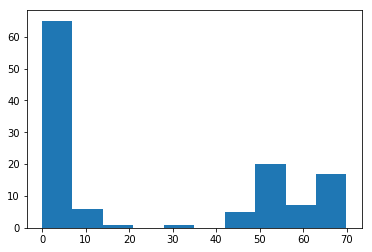

In [125]:
# check missing value of app_train
miss_app_train = check_missing_col(app_train)
missing_hist(miss_app_train)

        missing_num  minssing_percent
133770           61              50.0
244833           61              50.0
150206           61              50.0
69707            61              50.0
269786           61              50.0
         missing_num  minssing_percent
count  307511.000000     307511.000000
mean       29.763049         24.395942
std        20.919345         17.147004
min         0.000000          0.000000
25%         5.000000          4.098361
50%        36.000000         29.508197
75%        49.000000         40.163934
max        61.000000         50.000000


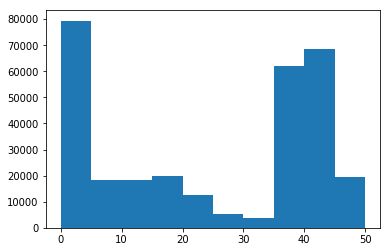

In [126]:
missing_hist(check_missing_row(app_train))

                       missing_num  minssing_percent
CNT_INSTALMENT_FUTURE        26087          0.260835
CNT_INSTALMENT               26071          0.260675
SK_DPD_DEF                       0          0.000000
SK_DPD                           0          0.000000
NAME_CONTRACT_STATUS             0          0.000000
        missing_num  minssing_percent
count      8.000000          8.000000
mean    6519.750000          0.065189
std    12072.231948          0.120706
min        0.000000          0.000000
25%        0.000000          0.000000
50%        0.000000          0.000000
75%     6517.750000          0.065169
max    26087.000000          0.260835


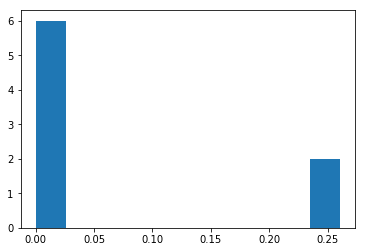

In [127]:
# check missing value of POS_CASH_balance
miss_POS_CASH = check_missing_col(POS_CASH_balance)
missing_hist(miss_POS_CASH)

         missing_num  minssing_percent
8095302            2              25.0
6099819            2              25.0
7188626            2              25.0
7188625            2              25.0
5799073            2              25.0
        missing_num  minssing_percent
count  1.000136e+07      1.000136e+07
mean   5.215092e-03      6.518865e-02
std    1.018921e-01      1.273651e+00
min    0.000000e+00      0.000000e+00
25%    0.000000e+00      0.000000e+00
50%    0.000000e+00      0.000000e+00
75%    0.000000e+00      0.000000e+00
max    2.000000e+00      2.500000e+01


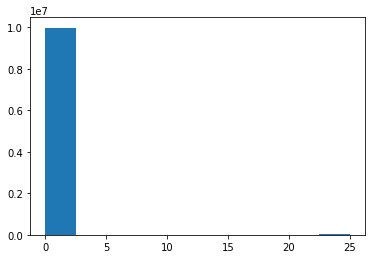

In [128]:
missing_hist(check_missing_row(POS_CASH_balance))

                missing_num  minssing_percent
STATUS                    0               0.0
MONTHS_BALANCE            0               0.0
SK_ID_BUREAU              0               0.0
       missing_num  minssing_percent
count          3.0               3.0
mean           0.0               0.0
std            0.0               0.0
min            0.0               0.0
25%            0.0               0.0
50%            0.0               0.0
75%            0.0               0.0
max            0.0               0.0


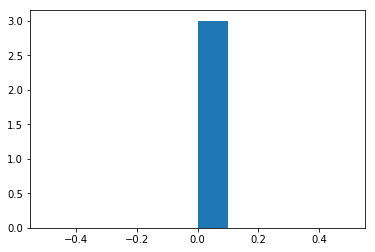

In [129]:
miss_bureau_balance = check_missing_col(bureau_balance)
missing_hist(miss_bureau_balance)

          missing_num  minssing_percent
27299924            0               0.0
9099834             0               0.0
9099966             0               0.0
9099967             0               0.0
9099968             0               0.0
       missing_num  minssing_percent
count   27299925.0        27299925.0
mean           0.0               0.0
std            0.0               0.0
min            0.0               0.0
25%            0.0               0.0
50%            0.0               0.0
75%            0.0               0.0
max            0.0               0.0


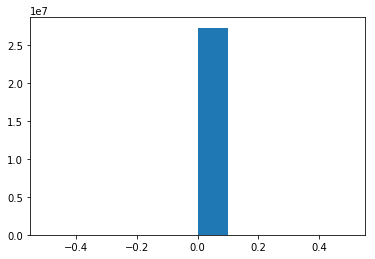

In [131]:
missing_hist(check_missing_row(bureau_balance))

                          missing_num  minssing_percent
RATE_INTEREST_PRIVILEGED      1664263         99.643698
RATE_INTEREST_PRIMARY         1664263         99.643698
RATE_DOWN_PAYMENT              895844         53.636480
AMT_DOWN_PAYMENT               895844         53.636480
NAME_TYPE_SUITE                820405         49.119754
        missing_num  minssing_percent
count  3.700000e+01         37.000000
mean   3.002523e+05         17.976877
std    4.602509e+05         27.556401
min    0.000000e+00          0.000000
25%    0.000000e+00          0.000000
50%    0.000000e+00          0.000000
75%    6.730650e+05         40.298129
max    1.664263e+06         99.643698


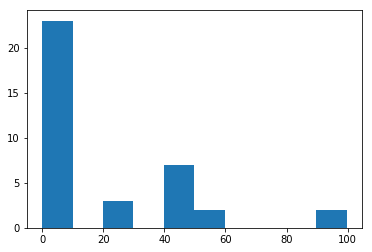

In [132]:
#check_missing(previous_application)
missing_hist(check_missing_col(previous_application))

        missing_num  minssing_percent
402355           15         40.540541
545870           15         40.540541
24543            15         40.540541
205845           15         40.540541
366790           15         40.540541
        missing_num  minssing_percent
count  1.670214e+06      1.670214e+06
mean   6.651445e+00      1.797688e+01
std    4.648636e+00      1.256388e+01
min    0.000000e+00      0.000000e+00
25%    2.000000e+00      5.405405e+00
50%    4.000000e+00      1.081081e+01
75%    1.100000e+01      2.972973e+01
max    1.500000e+01      4.054054e+01


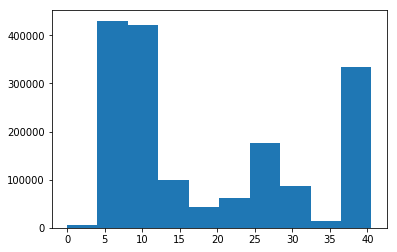

In [86]:
missing_hist(check_missing_row(previous_application))

                          missing_num  minssing_percent
RATE_INTEREST_PRIVILEGED      1664263         99.643698
RATE_INTEREST_PRIMARY         1664263         99.643698
RATE_DOWN_PAYMENT              895844         53.636480
AMT_DOWN_PAYMENT               895844         53.636480
NAME_TYPE_SUITE                820405         49.119754
        missing_num  minssing_percent
count  3.700000e+01         37.000000
mean   3.002523e+05         17.976877
std    4.602509e+05         27.556401
min    0.000000e+00          0.000000
25%    0.000000e+00          0.000000
50%    0.000000e+00          0.000000
75%    6.730650e+05         40.298129
max    1.664263e+06         99.643698


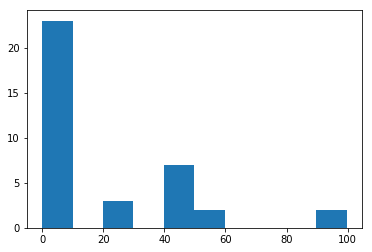

In [69]:
#check_missing(credit_card_balance)
missing_hist(check_missing_col(credit_card_balance))

        missing_num  minssing_percent
402355           15         40.540541
545870           15         40.540541
24543            15         40.540541
205845           15         40.540541
366790           15         40.540541
        missing_num  minssing_percent
count  1.670214e+06      1.670214e+06
mean   6.651445e+00      1.797688e+01
std    4.648636e+00      1.256388e+01
min    0.000000e+00      0.000000e+00
25%    2.000000e+00      5.405405e+00
50%    4.000000e+00      1.081081e+01
75%    1.100000e+01      2.972973e+01
max    1.500000e+01      4.054054e+01


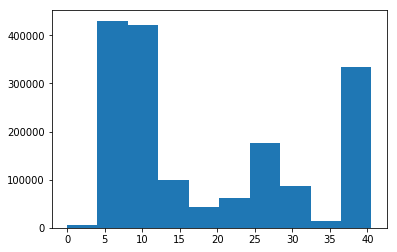

In [87]:
missing_hist(check_missing_row(credit_card_balance))

                        missing_num  minssing_percent
AMT_ANNUITY                 1226791         71.473490
AMT_CREDIT_MAX_OVERDUE      1124488         65.513264
DAYS_ENDDATE_FACT            633653         36.916958
AMT_CREDIT_SUM_LIMIT         591780         34.477415
AMT_CREDIT_SUM_DEBT          257669         15.011932
        missing_num  minssing_percent
count  1.700000e+01         17.000000
mean   2.317616e+05         13.502552
std    4.096962e+05         23.869116
min    0.000000e+00          0.000000
25%    0.000000e+00          0.000000
50%    0.000000e+00          0.000000
75%    2.576690e+05         15.011932
max    1.226791e+06         71.473490


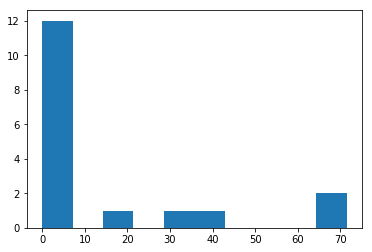

In [70]:
#check_missing(bureau)
missing_hist(check_missing_col(bureau))

        missing_num  minssing_percent
793046            6         35.294118
773821            6         35.294118
871866            6         35.294118
468959            6         35.294118
701505            6         35.294118
        missing_num  minssing_percent
count  1.716428e+06      1.716428e+06
mean   2.295434e+00      1.350255e+01
std    1.126084e+00      6.624026e+00
min    0.000000e+00      0.000000e+00
25%    1.000000e+00      5.882353e+00
50%    2.000000e+00      1.176471e+01
75%    3.000000e+00      1.764706e+01
max    6.000000e+00      3.529412e+01


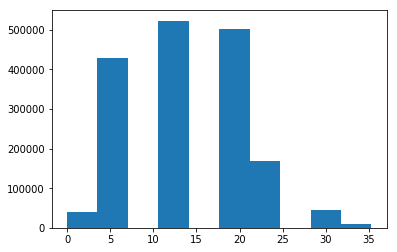

In [88]:
missing_hist(check_missing_row(bureau))

# Select and Re-Encode Features

In [133]:
def select_feature_type(df,data_type):
    return df.select_dtypes(include=[data_type])

In [134]:
def count_feature_type(df):
    return df.dtypes.value_counts()

In [135]:
def count_col_unique(df,data_type):
    '''count the total unique value number of each colunm
    data_type could be object,category'''
    return df.select_dtypes(data_type).apply(pd.Series.nunique, axis = 0)

In [136]:
def count_col_each_unique(df,col_name):
    '''count total number of observations of each unique value of a colunm'''
    return df.groupby(col_name)[col_name].count()

In [137]:
def check_distribution(df,col_name):
    print(df[col_name].describe())
    print('Total missing value number: ',df[col_name].isnull().sum())
    plt.figure(figsize=(12,5))
    sns.distplot(df[col_name].dropna())

In [138]:
def label_encoder(df, categorical_columns=None):
    """Encode categorical values as integers (0,1,2,3...) with pandas.factorize. """
    # if categorical_colunms are not given than treat object as categorical features
    if not categorical_columns:
        categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    for col in categorical_columns:
        df[col], uniques = pd.factorize(df[col])
    return df, categorical_columns

In [139]:
def one_hot_encoder(df, categorical_columns=None, nan_as_category=True):
    """Create a new column for each categorical value in categorical columns. """
    original_columns = list(df.columns)
    if not categorical_columns:
        categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns=categorical_columns, dummy_na=nan_as_category)
    categorical_columns = [c for c in df.columns if c not in original_columns]
    return df, categorical_columns


## check value type and correct wrong values

In [140]:
count_feature_type(app)

float64    66
int64      40
object     16
dtype: int64

In [141]:
count_col_unique(app_train,'object')

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [142]:
count_col_each_unique(app,'CODE_GENDER')

CODE_GENDER
F      235126
M      121125
XNA         4
Name: CODE_GENDER, dtype: int64

count    3.562550e+05
mean     1.701161e+05
std      2.235068e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.530000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64
Total missing value number:  0


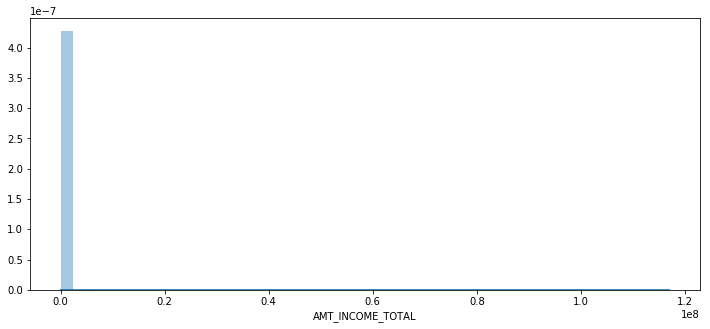

In [143]:
check_distribution(app,'AMT_INCOME_TOTAL')

count    356255.000000
mean      64317.231413
std      141705.532576
min      -17912.000000
25%       -2781.000000
50%       -1224.000000
75%        -290.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64
Total missing value number:  0


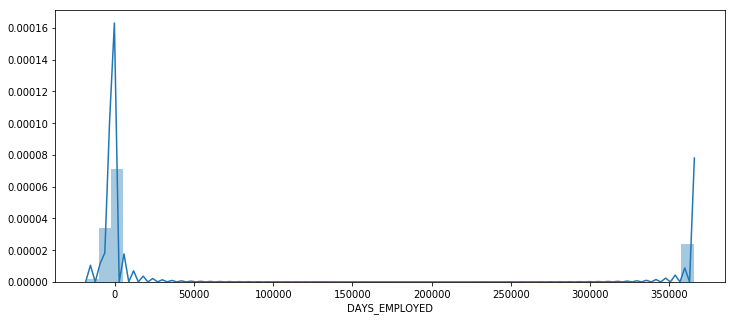

In [144]:
# this discussion https://www.kaggle.com/c/home-credit-default-risk/discussion/57247#332033
# says 365243 means NA
check_distribution(app,'DAYS_EMPLOYED')

count    356254.000000
mean       -978.580852
std         835.063902
min       -4361.000000
25%       -1592.000000
50%        -771.000000
75%        -286.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64
Total missing value number:  1


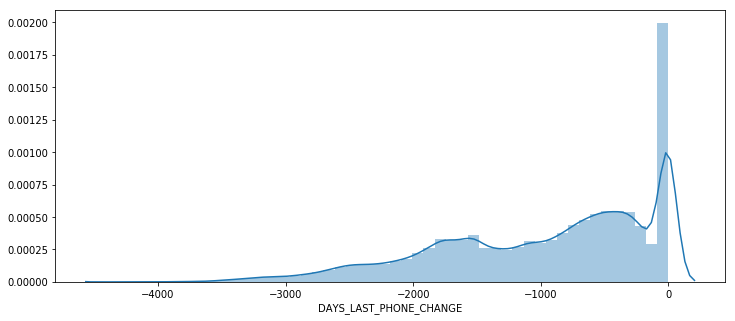

In [145]:
# total number of 1 missing value and add spike on value 0
# 0 could mean nan value
check_distribution(app,'DAYS_LAST_PHONE_CHANGE')

In [208]:
# remove 4 people code_gender value 'XNA'
app = app[app['CODE_GENDER'] != 'XNA']  # 4 people with XNA code gender
app.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
48739,456221,NaN,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,NaN,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,NaN,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,NaN,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
48743,456250,NaN,Cash loans,F,Y,N,0,135000.0,312768.0,24709.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0


In [209]:
app['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)
app.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
48739,456221,NaN,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,NaN,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,NaN,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,NaN,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
48743,456250,NaN,Cash loans,F,Y,N,0,135000.0,312768.0,24709.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0


In [210]:
app['DAYS_LAST_PHONE_CHANGE'].replace(0, np.nan, inplace=True)
app.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
48739,456221,NaN,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,NaN,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,NaN,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,NaN,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
48743,456250,NaN,Cash loans,F,Y,N,0,135000.0,312768.0,24709.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0


In [211]:
# change all categorical feature to numerical 
app_clean, categorical_columns = label_encoder(app, categorical_columns=None)

In [212]:
app_clean.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
48739,456221,NaN,2,3,2,2,0,121500.0,412560.0,17473.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,NaN,2,3,2,3,2,157500.0,622413.0,31909.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,NaN,2,3,3,2,1,202500.0,315000.0,33205.5,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,NaN,2,4,2,3,0,225000.0,450000.0,25128.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
48743,456250,NaN,2,3,3,3,0,135000.0,312768.0,24709.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0


In [151]:
# check bureau data
count_feature_type(bureau)

float64    8
int64      6
object     3
dtype: int64

In [152]:
count_col_unique(bureau,'object')

CREDIT_ACTIVE       4
CREDIT_CURRENCY     4
CREDIT_TYPE        15
dtype: int64

count    1.716428e+06
mean    -1.142108e+03
std      7.951649e+02
min     -2.922000e+03
25%     -1.666000e+03
50%     -9.870000e+02
75%     -4.740000e+02
max      0.000000e+00
Name: DAYS_CREDIT, dtype: float64
Total missing value number:  0


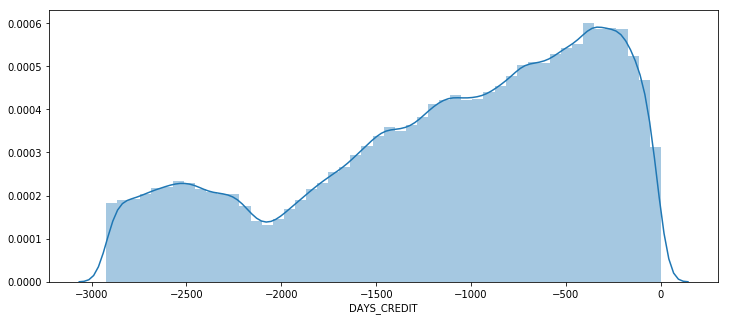

In [153]:
check_distribution(bureau,'DAYS_CREDIT')

count    1.716415e+06
mean     3.549946e+05
std      1.149811e+06
min      0.000000e+00
25%      5.130000e+04
50%      1.255185e+05
75%      3.150000e+05
max      5.850000e+08
Name: AMT_CREDIT_SUM, dtype: float64
Total missing value number:  13


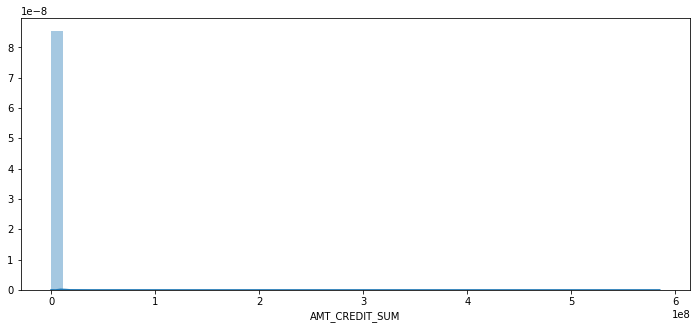

In [154]:
check_distribution(bureau,'AMT_CREDIT_SUM')

# Baseline Model

In [213]:
app_base_train = app_clean[app_clean['TARGET'].notnull()]
app_base_test = app_clean[app_clean['TARGET'].isnull()]
app_base_test.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,NaN,2,3,2,2,0,135000.0,568800.0,20560.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,NaN,2,4,2,2,0,99000.0,222768.0,17370.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,NaN,2,4,3,2,0,202500.0,663264.0,69777.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,NaN,2,3,2,2,2,315000.0,1575000.0,49018.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,NaN,2,4,3,3,1,180000.0,625500.0,32067.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
def cross_validate(train):
    """Compute cross validation ROC AUC of a gradient boosting model for a given training dataset"""
    
    # Extract the labels
    train_labels = np.array(train['TARGET'].astype(np.int32)).reshape((-1, ))
    train = train.drop(columns = ['TARGET', 'SK_ID_CURR'])

    # Create a  lgb training set
    train_set = lgb.Dataset(train, label = train_labels)

    # Find default hyperparameters
    model = lgb.LGBMClassifier()
    params = model.get_params()

    # Number of estimators will be selected through early stopping
    del params['n_estimators'], params['silent']

    # Early stoppping with 5 fold cross validation
    cv_results = lgb.cv(params, train_set, num_boost_round = 10000, metrics = 'auc', 
                        early_stopping_rounds = 100, seed = RSEED, nfold = 5)

    print('Cross Validation ROC AUC: {:.5f} with std: {:.5f}.'.format(cv_results['auc-mean'][-1],
                                                                               cv_results['auc-stdv'][-1]))

    print('Number of estimators trained: {}'.format(len(cv_results['auc-mean'])))
    
    return cv_results

In [220]:
cv_results_baseline = cross_validate(app_base_train)

Cross Validation ROC AUC: 0.75575 with std: 0.00582.
Number of estimators trained: 172


In [174]:
def make_submission(cv_results, train, test):
    """Make a submission dataframe for the Kaggle competition for a given dataset."""
    
    # Extract the labels
    train_labels = np.array(train['TARGET'].astype(np.int32)).reshape((-1, ))
    train = train.drop(columns = ['TARGET', 'SK_ID_CURR'])
    test_ids = list(test['SK_ID_CURR'])
    test = test.drop(columns = ['TARGET','SK_ID_CURR'])
    
    # Make model with optimal number of estimators and train on training data
    model = lgb.LGBMClassifier(n_estimators = len(cv_results['auc-mean']), random_state=RSEED)
    model.fit(train, train_labels)
    
    # Make predictions on the testing data
    preds = model.predict_proba(test)[:, 1]
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 
                                'TARGET': preds})
    
    return submission

In [102]:
submission_baseline = make_submission(cv_results_baseline, app_base_train, app_base_test)
submission_baseline.to_csv('./data/submission_baseline.csv', index = False)

# Semi-Auto Feature

In [159]:
def agg_numeric(df_child, parent_var, df_col_name):
    """
    Groups and aggregates the numeric values in a child dataframe
    by the parent variable.
    
    Parameters
    --------
        df_child (dataframe): 
            the child dataframe to calculate the statistics on
        parent_var (string): 
            the parent variable used for grouping and aggregating
        df_col_name (string): 
            the variable used to rename the columns
        
    Return
    --------
        agg (dataframe): 
            a dataframe with the statistics aggregated by the `parent_var` for 
            all numeric columns. The aggregate function are 'count', 'mean', 'max', 'min', 'sum'
            Each observation of the parent variable will have 
            one row in the dataframe with the parent variable as the index. 
            The columns are also renamed using the `df_col_name`. Columns with all duplicate
            values are removed. 
    
    """
    
    # Remove id variables other than grouping variable
    # e.g. SK_ID_BUREAU
    for col in df_child:
        if col != parent_var and 'SK_ID' in col:
            df_child = df_child.drop(columns = col)
            
    # Only want the numeric variables
    parent_ids = df_child[parent_var].copy()
    numeric_df = df_child.select_dtypes('number').copy()
    numeric_df[parent_var] = parent_ids

    # Group by the specified variable and calculate the statistics
    agg = numeric_df.groupby(parent_var).agg(['count', 'mean', 'max', 'min', 'sum'])

    # Need to create new column names
    columns = []

    # Iterate through the variables names
    for var in agg.columns.levels[0]:
        if var != parent_var:
            # Iterate through the stat names
            for stat in agg.columns.levels[1]:
                # Make a new column name for the variable and stat
                columns.append('%s_%s_%s' % (df_col_name, var, stat))
    
    agg.columns = columns
    
    # Remove the columns with all redundant values
    _, idx = np.unique(agg, axis = 1, return_index=True)
    agg = agg.iloc[:, idx]
    
    return agg

In [105]:
bureau_agg = agg_numeric(bureau, 'SK_ID_CURR', 'BUREAU')
bureau_agg.head()

,BUREAU_DAYS_CREDIT_sum,BUREAU_DAYS_ENDDATE_FACT_sum,BUREAU_DAYS_CREDIT_min,BUREAU_DAYS_CREDIT_ENDDATE_min,BUREAU_DAYS_ENDDATE_FACT_min,BUREAU_DAYS_ENDDATE_FACT_mean,BUREAU_DAYS_CREDIT_mean,BUREAU_DAYS_CREDIT_UPDATE_sum,BUREAU_DAYS_ENDDATE_FACT_max,BUREAU_DAYS_CREDIT_UPDATE_min,...,BUREAU_AMT_CREDIT_SUM_DEBT_mean,BUREAU_AMT_CREDIT_SUM_min,BUREAU_AMT_CREDIT_SUM_mean,BUREAU_AMT_CREDIT_SUM_DEBT_max,BUREAU_AMT_CREDIT_SUM_max,BUREAU_AMT_CREDIT_SUM_DEBT_sum,BUREAU_AMT_CREDIT_SUM_sum,BUREAU_AMT_CREDIT_MAX_OVERDUE_min,BUREAU_AMT_CREDIT_MAX_OVERDUE_mean,BUREAU_AMT_CREDIT_MAX_OVERDUE_max
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,-5145,-3302.0,-1572,-1329.0,-1328.0,-825.500000,-735.000000,-652,-544.0,-155,...,85240.928571,85500.0,207623.571429,373239.0,378000.0,596686.5,1453365.000,NaN,NaN,NaN
100002,-6992,-4185.0,-1437,-1072.0,-1185.0,-697.500000,-874.000000,-3999,-36.0,-1185,...,49156.200000,0.0,108131.945625,245781.0,450000.0,245781.0,865055.565,0.0,1681.029,5043.645
100003,-5603,-3292.0,-2586,-2434.0,-2131.0,-1097.333333,-1400.750000,-3264,-540.0,-2131,...,0.000000,22248.0,254350.125000,0.0,810000.0,0.0,1017400.500,0.0,0.000,0.000
100004,-1734,-1065.0,-1326,-595.0,-683.0,-532.500000,-867.000000,-1064,-382.0,-682,...,0.000000,94500.0,94518.900000,0.0,94537.8,0.0,189037.800,0.0,0.000,0.000
100005,-572,-123.0,-373,-128.0,-123.0,-123.000000,-190.666667,-163,-123.0,-121,...,189469.500000,29826.0,219042.000000,543087.0,568800.0,568408.5,657126.000,0.0,0.000,0.000


In [214]:
app_clean_second = pd.merge(app_clean,bureau_agg,on='SK_ID_CURR',how='left')

In [216]:
app_base_train_second = app_clean_second[app_clean_second['TARGET'].notnull()]
app_base_test_second = app_clean_second[app_clean_second['TARGET'].isnull()]


In [217]:
app_base_train_second.head()
app_base_test_second.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,BUREAU_AMT_CREDIT_SUM_DEBT_mean,BUREAU_AMT_CREDIT_SUM_min,BUREAU_AMT_CREDIT_SUM_mean,BUREAU_AMT_CREDIT_SUM_DEBT_max,BUREAU_AMT_CREDIT_SUM_max,BUREAU_AMT_CREDIT_SUM_DEBT_sum,BUREAU_AMT_CREDIT_SUM_sum,BUREAU_AMT_CREDIT_MAX_OVERDUE_min,BUREAU_AMT_CREDIT_MAX_OVERDUE_mean,BUREAU_AMT_CREDIT_MAX_OVERDUE_max
307511,100001,NaN,2,3,2,2,0,135000.0,568800.0,20560.5,...,85240.928571,85500.00,207623.571429,373239.0,378000.0,596686.5,1453365.00,NaN,NaN,NaN
307512,100005,NaN,2,4,2,2,0,99000.0,222768.0,17370.0,...,189469.500000,29826.00,219042.000000,543087.0,568800.0,568408.5,657126.00,0.0,0.0,0.0
307513,100013,NaN,2,4,3,2,0,202500.0,663264.0,69777.0,...,0.000000,26490.06,518070.015000,0.0,1262250.0,0.0,2072280.06,19305.0,19305.0,19305.0
307514,100028,NaN,2,3,2,2,2,315000.0,1575000.0,49018.5,...,18630.450000,0.00,126739.590000,151015.5,393750.0,186304.5,1520875.08,0.0,0.0,0.0
307515,100038,NaN,2,4,3,3,1,180000.0,625500.0,32067.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [218]:
cv_results_second = cross_validate(app_base_train_second)

Cross Validation ROC AUC: 0.76083 with std: 0.00462.
Number of estimators trained: 199


In [219]:
submission_second = make_submission(cv_results_second, app_base_train_second, app_base_test_second)
submission_second.to_csv('./data/submission_second.csv', index = False)